In [1]:
from google.colab import drive

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
data=pd.read_csv("/content/drive/MyDrive/tips.csv")
X= data.iloc[:, :12]
Y= data.iloc[:, -1]

In [7]:
print(data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [8]:
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
data.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [12]:
sns.set_theme()

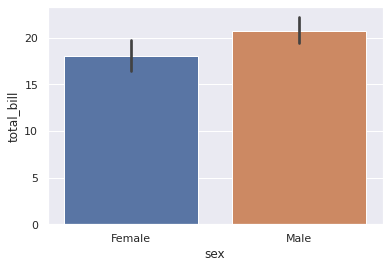

In [15]:
sns.barplot(x="sex", y="total_bill",data = data)
plt.show()


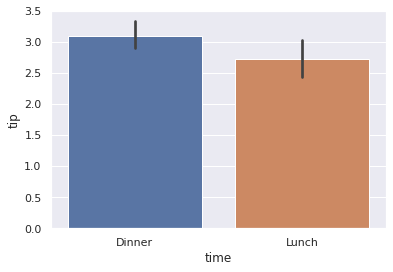

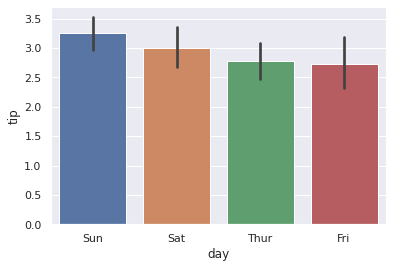

In [17]:
sns.barplot(x="time", y="tip",data = data)
plt.show()
sns.barplot(x="day", y="tip",data = data)
plt.show()


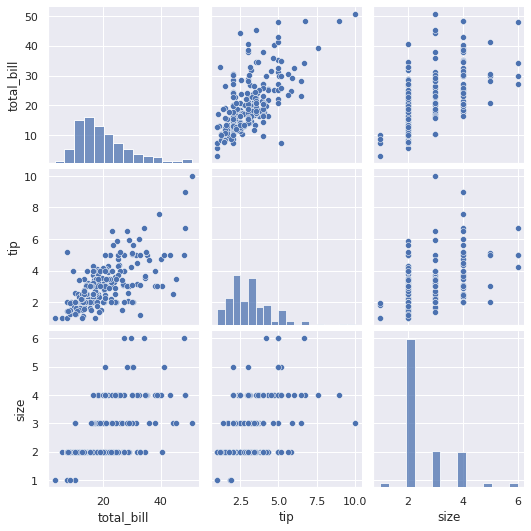

In [18]:
sns.pairplot(data)
plt.show()

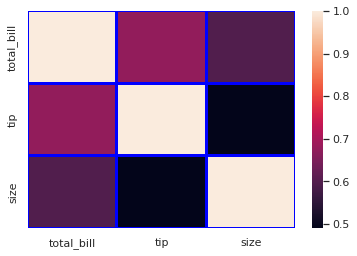

In [23]:
sns.heatmap(data.corr(),linecolor="blue", linewidths=2)
plt.show()

In [24]:
data.shape

(244, 7)

In [30]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 50)

In [31]:
X_train

array([[15.48, 2.02, 'Male', 'Yes', 'Thur', 'Lunch'],
       [24.52, 3.48, 'Male', 'No', 'Sun', 'Dinner'],
       [15.01, 2.09, 'Male', 'Yes', 'Sat', 'Dinner'],
       ...,
       [13.16, 2.75, 'Female', 'No', 'Thur', 'Lunch'],
       [13.42, 1.58, 'Male', 'Yes', 'Fri', 'Lunch'],
       [17.89, 2.0, 'Male', 'Yes', 'Sun', 'Dinner']], dtype=object)

In [32]:
X_test

array([[12.03, 1.5, 'Male', 'Yes', 'Fri', 'Dinner'],
       [10.33, 1.67, 'Female', 'No', 'Sun', 'Dinner'],
       [27.18, 2.0, 'Female', 'Yes', 'Sat', 'Dinner'],
       [17.92, 4.08, 'Male', 'No', 'Sat', 'Dinner'],
       [28.15, 3.0, 'Male', 'Yes', 'Sat', 'Dinner'],
       [29.93, 5.07, 'Male', 'No', 'Sun', 'Dinner'],
       [25.21, 4.29, 'Male', 'Yes', 'Sat', 'Dinner'],
       [17.92, 3.08, 'Male', 'Yes', 'Sat', 'Dinner'],
       [31.27, 5.0, 'Male', 'No', 'Sat', 'Dinner'],
       [18.69, 2.31, 'Male', 'No', 'Sat', 'Dinner'],
       [20.45, 3.0, 'Male', 'No', 'Sat', 'Dinner'],
       [18.15, 3.5, 'Female', 'Yes', 'Sun', 'Dinner'],
       [10.07, 1.83, 'Female', 'No', 'Thur', 'Lunch'],
       [14.15, 2.0, 'Female', 'No', 'Thur', 'Lunch'],
       [14.73, 2.2, 'Female', 'No', 'Sat', 'Dinner'],
       [24.71, 5.85, 'Male', 'No', 'Thur', 'Lunch'],
       [11.59, 1.5, 'Male', 'Yes', 'Sat', 'Dinner'],
       [7.25, 5.15, 'Male', 'Yes', 'Sun', 'Dinner'],
       [40.55, 3.0, 'Male', 'Yes', '

In [33]:
Y_train

array([2, 3, 2, 2, 5, 2, 4, 2, 2, 2, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 3, 5, 4, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 5, 2, 2, 3, 4, 2, 2,
       4, 2, 3, 2, 2, 2, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 4, 6, 4, 6, 2, 2,
       2, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 3, 4, 2, 4, 3, 2, 2, 2,
       4, 2, 2, 3, 2, 2, 3, 2, 2, 3, 6, 2, 2, 3, 3, 6, 2, 2, 3, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 1, 3, 4, 3, 2, 2, 2, 2, 2,
       2, 1, 4, 2, 2, 2, 2])

In [34]:
Y_test

array([2, 3, 2, 2, 5, 4, 2, 2, 3, 3, 4, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 3, 3, 3, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 5])

In [46]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = X_train
X_test = X_test

    



In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train, Y_train

(array([[15.48, 2.02, 'Male', 'Yes', 'Thur', 'Lunch'],
        [24.52, 3.48, 'Male', 'No', 'Sun', 'Dinner'],
        [15.01, 2.09, 'Male', 'Yes', 'Sat', 'Dinner'],
        ...,
        [13.16, 2.75, 'Female', 'No', 'Thur', 'Lunch'],
        [13.42, 1.58, 'Male', 'Yes', 'Fri', 'Lunch'],
        [17.89, 2.0, 'Male', 'Yes', 'Sun', 'Dinner']], dtype=object),
 array([2, 3, 2, 2, 5, 2, 4, 2, 2, 2, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 3, 5, 4, 4, 2, 2, 2, 4, 2,
        2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 5, 2, 2, 3, 4, 2, 2,
        4, 2, 3, 2, 2, 2, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 4, 6, 4, 6, 2, 2,
        2, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 3, 4, 2, 4, 3, 2, 2, 2,
        4, 2, 2, 3, 2, 2, 3, 2, 2, 3, 6, 2, 2, 3, 3, 6, 2, 2, 3, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
        4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 1, 3, 4, 3, 2, 2, 2, 2, 2,
        2, 1, 4, 2, 2, 2, 2]))

In [62]:
y_pred = X_test

In [63]:
y_pred

array([[12.03, 1.5, 'Male', 'Yes', 'Fri', 'Dinner'],
       [10.33, 1.67, 'Female', 'No', 'Sun', 'Dinner'],
       [27.18, 2.0, 'Female', 'Yes', 'Sat', 'Dinner'],
       [17.92, 4.08, 'Male', 'No', 'Sat', 'Dinner'],
       [28.15, 3.0, 'Male', 'Yes', 'Sat', 'Dinner'],
       [29.93, 5.07, 'Male', 'No', 'Sun', 'Dinner'],
       [25.21, 4.29, 'Male', 'Yes', 'Sat', 'Dinner'],
       [17.92, 3.08, 'Male', 'Yes', 'Sat', 'Dinner'],
       [31.27, 5.0, 'Male', 'No', 'Sat', 'Dinner'],
       [18.69, 2.31, 'Male', 'No', 'Sat', 'Dinner'],
       [20.45, 3.0, 'Male', 'No', 'Sat', 'Dinner'],
       [18.15, 3.5, 'Female', 'Yes', 'Sun', 'Dinner'],
       [10.07, 1.83, 'Female', 'No', 'Thur', 'Lunch'],
       [14.15, 2.0, 'Female', 'No', 'Thur', 'Lunch'],
       [14.73, 2.2, 'Female', 'No', 'Sat', 'Dinner'],
       [24.71, 5.85, 'Male', 'No', 'Thur', 'Lunch'],
       [11.59, 1.5, 'Male', 'Yes', 'Sat', 'Dinner'],
       [7.25, 5.15, 'Male', 'Yes', 'Sun', 'Dinner'],
       [40.55, 3.0, 'Male', 'Yes', '